**I have updated two parts 'Resampling for unbalanced dataset' and 'Using k-fold validation to train CNN (NEW)'.**

In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
2.9.1


In [10]:
import pandas as pd   ## data analysis and manipulation
import numpy as np    ## numerial computing
import seaborn as sns ##  data visualization library based on matplotlib
import tensorflow.keras as keras ## main deep learning API

## additional functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

Load the data, change to your directory

In [12]:
#load the data
df = pd.read_csv("/Users/a123456/Desktop/Fei's Project/Data/OCT_BASELINE_GRI__VF_6-3_FP-15_NO_PHI.csv")
df

,EID,PID,DOB,Eye,ImageID,Scan.Type,Diameter..mm.,Diameter....,Fixed.in.mm,ExamDate,...,VF_EXAM_START,VF_EXAM_END,VF_FOLLOW_UP,VF_N,VF_OCT_BASELINE_DIFF,VF_OCT_FINAL_DIFF,MD_BASELINE,MD_FINAL,VFI_BASELINE,VFI_FINAL
0,1,1,10/24/1949,LE,282596.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,5/11/2017,12/2/2020,3.561944,6,0.000000,3.561944,-2.15,-3.26,98,96
1,2,1,10/24/1949,RE,282593.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,5/11/2017,12/2/2020,3.561944,6,0.000000,3.561944,-7.73,-11.45,82,73
2,3,2,8/7/1939,LE,239514.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,8/26/2014,10/20/2020,6.151951,6,0.000000,6.151951,-1.28,-1.13,98,97
3,4,2,8/7/1939,RE,239512.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,8/26/2014,10/20/2020,6.151951,6,0.000000,6.151951,-0.72,0.60,98,99
4,5,3,5/20/1943,LE,238460.0,OCT Circle Scan,3.5,12.0,0,7/9/2014,...,6/30/2014,10/14/2020,6.291581,10,0.024641,6.266940,-1.69,-0.51,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,329,3/22/1952,RE,837.0,OCT Circle Scan,3.7,12.0,0,5/5/2011,...,5/5/2011,12/10/2020,9.601643,17,0.000000,9.601643,0.53,-2.51,98,93
580,581,330,5/15/1945,LE,243095.0,OCT Circle Scan,3.5,12.0,0,12/17/2014,...,12/17/2014,11/25/2020,5.941136,10,0.000000,5.941136,-8.97,-14.71,78,56
581,582,330,5/15/1945,RE,243093.0,OCT Circle Scan,3.7,12.0,0,12/17/2014,...,12/17/2014,11/25/2020,5.941136,9,0.000000,5.941136,-11.39,-11.37,70,67
582,583,331,5/31/1939,LE,109347.0,OCT Circle Scan,3.5,12.0,0,8/13/2013,...,6/11/2013,10/23/2019,6.365503,11,0.172485,6.193018,-3.48,-19.28,97,51


In [13]:
#filter only circle scan data
circle_scan = (df['Scan.Type'] == 'OCT Circle Scan')
df = df[circle_scan]
df.shape

(580, 811)

Replace NA values in GRI with 0

In [14]:
list(df.columns)

['EID',
 'PID',
 'DOB',
 'Eye',
 'ImageID',
 'Scan.Type',
 'Diameter..mm.',
 'Diameter....',
 'Fixed.in.mm',
 'ExamDate',
 'ExamTime',
 'AQMVersion',
 'Quality',
 'ARTMean',
 'RNFLMean_G',
 'RNFLMean_T',
 'RNFLMean_TS',
 'RNFLMean_TI',
 'RNFLMean_N',
 'RNFLMean_NS',
 'RNFLMean_NI',
 'RNFLClass_G',
 'RNFLClass_T',
 'RNFLClass_TS',
 'RNFLClass_TI',
 'RNFLClass_N',
 'RNFLClass_NS',
 'RNFLClass_NI',
 'RNFLT.1',
 'RNFLT.2',
 'RNFLT.3',
 'RNFLT.4',
 'RNFLT.5',
 'RNFLT.6',
 'RNFLT.7',
 'RNFLT.8',
 'RNFLT.9',
 'RNFLT.10',
 'RNFLT.11',
 'RNFLT.12',
 'RNFLT.13',
 'RNFLT.14',
 'RNFLT.15',
 'RNFLT.16',
 'RNFLT.17',
 'RNFLT.18',
 'RNFLT.19',
 'RNFLT.20',
 'RNFLT.21',
 'RNFLT.22',
 'RNFLT.23',
 'RNFLT.24',
 'RNFLT.25',
 'RNFLT.26',
 'RNFLT.27',
 'RNFLT.28',
 'RNFLT.29',
 'RNFLT.30',
 'RNFLT.31',
 'RNFLT.32',
 'RNFLT.33',
 'RNFLT.34',
 'RNFLT.35',
 'RNFLT.36',
 'RNFLT.37',
 'RNFLT.38',
 'RNFLT.39',
 'RNFLT.40',
 'RNFLT.41',
 'RNFLT.42',
 'RNFLT.43',
 'RNFLT.44',
 'RNFLT.45',
 'RNFLT.46',
 'RNFLT.47',

In [15]:
df['GRI'] = df['GRI'].fillna(0)
df['GRI']

/var/folders/ld/l5hmq0nn6tg8mfw0_3xycn180000gn/T/ipykernel_63063/2630850070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GRI'] = df['GRI'].fillna(0)


0      -3.688171
1      -6.827438
2       0.329429
3       0.581343
4       0.000000
         ...    
579   -11.691467
580   -19.908699
581   -10.130481
582   -24.731627
583   -18.674765
Name: GRI, Length: 580, dtype: float64

Without filtering

#filter MD_BASELINE > -12
md_filter = (df['MD_BASELINE'] > -12)
df = df[md_filter]
df.shape

Define binary progression outcome

In [16]:
df_raw = df
y = pd.cut(df.GRI, bins=[-float('inf'), -6, float('inf')],
                  labels=['Progressor','Non-Progressor'], ordered=False)

y

0      Non-Progressor
1          Progressor
2      Non-Progressor
3      Non-Progressor
4      Non-Progressor
            ...      
579        Progressor
580        Progressor
581        Progressor
582        Progressor
583        Progressor
Name: GRI, Length: 580, dtype: category
Categories (2, object): ['Progressor', 'Non-Progressor']

In [17]:
df = df_raw.iloc[:, np.r_[1, 28:797]]
df

,PID,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,...,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768,GRI
0,1,47.0,47.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,...,47.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0,-3.688171
1,1,70.0,71.0,72.0,72.0,73.0,73.0,73.0,73.0,74.0,...,59.0,60.0,61.0,62.0,63.0,65.0,66.0,67.0,69.0,-6.827438
2,2,44.0,45.0,45.0,45.0,46.0,47.0,48.0,50.0,51.0,...,44.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,44.0,0.329429
3,2,44.0,44.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,...,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0.581343
4,3,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,36.0,36.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,329,100.0,103.0,106.0,108.0,111.0,112.0,113.0,113.0,113.0,...,82.0,83.0,84.0,86.0,87.0,89.0,92.0,94.0,97.0,-11.691467
580,330,52.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,46.0,47.0,47.0,48.0,48.0,49.0,49.0,50.0,51.0,-19.908699
581,330,62.0,63.0,64.0,65.0,66.0,67.0,68.0,68.0,68.0,...,54.0,55.0,56.0,57.0,58.0,58.0,59.0,60.0,61.0,-10.130481
582,331,47.0,47.0,48.0,48.0,49.0,49.0,50.0,50.0,50.0,...,47.0,47.0,46.0,46.0,45.0,45.0,46.0,46.0,46.0,-24.731627


In [18]:
#drop missing values
df = df.dropna()
df.isnull().values.sum()
df.shape

(575, 770)

In [19]:
y = pd.cut(df.GRI, bins=[-float('inf'), -6, float('inf')],
                  labels=['Progressor','Non-Progressor'], ordered=False)

y

0      Non-Progressor
1          Progressor
2      Non-Progressor
3      Non-Progressor
4      Non-Progressor
            ...      
579        Progressor
580        Progressor
581        Progressor
582        Progressor
583        Progressor
Name: GRI, Length: 575, dtype: category
Categories (2, object): ['Progressor', 'Non-Progressor']

In [20]:
# https://github.com/applied-systems-biology/Dynamic_SPHARM/blob/master/SPHARM/classes/stratified_group_shuffle_split.py

from __future__ import print_function
from __future__ import division

from sklearn.utils.validation import check_array
from sklearn.model_selection import StratifiedShuffleSplit


class GroupShuffleSplitStratified(StratifiedShuffleSplit):

    def __init__(self, n_splits=5, test_size=2, train_size=None, random_state=None):

        super(GroupShuffleSplitStratified, self).__init__(
            n_splits=n_splits,
            test_size=test_size,
            train_size=train_size,
            random_state=random_state)

    def _iter_indices(self, X, y, groups):
        if groups is None:
            raise ValueError("The 'groups' parameter should not be None.")
        groups = check_array(groups, ensure_2d=False, dtype=None)
        groups_unique, group_indices = np.unique(groups, return_inverse=True)
        classes = []
        for gr in groups_unique:
            classes.append(y[np.where(groups==gr)[0][0]])

        for group_train, group_test in super(
                GroupShuffleSplitStratified, self)._iter_indices(X=groups_unique, y=classes):
            # these are the indices of classes in the partition
            # invert them into data indices

            train = np.flatnonzero(np.in1d(group_indices, group_train))
            test = np.flatnonzero(np.in1d(group_indices, group_test))

            yield train, test

    def split(self, X, y=None, groups=None):
        return super(GroupShuffleSplitStratified, self).split(X, y, groups)

In [21]:
train_i,test_i = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(df,y, groups=df['PID']))
TrainVal = df.iloc[train_i]
TestSet = df.iloc[test_i]
print(TrainVal.shape)
print(TestSet.shape)

(523, 770)
(52, 770)


In [22]:
# y.iloc[train_i]
test_i

array([ 26,  27,  51,  52,  60,  61, 116, 141, 142, 143, 144, 193, 196,
       197, 198, 218, 219, 246, 247, 248, 249, 255, 256, 257, 258, 260,
       261, 270, 271, 274, 275, 285, 309, 310, 316, 317, 330, 331, 335,
       336, 366, 432, 472, 473, 476, 483, 495, 512, 524, 525, 536, 537])

In [23]:
train_id,val_id = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(TrainVal,y.iloc[train_i], groups=TrainVal['PID']))
TrainSet = TrainVal.iloc[train_id]
ValSet = TrainVal.iloc[val_id]
print(TrainSet.shape)
print(ValSet.shape)

(468, 770)
(55, 770)


In [24]:
x = df.iloc[test_i, 1:769]
print(x.isnull().values.sum())
print(x.shape)
x.head()

0
(52, 768)


,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,RNFLT.10,...,RNFLT.759,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768
26,34.0,34.0,35.0,35.0,36.0,36.0,37.0,38.0,39.0,39.0,...,34.0,33.0,33.0,33.0,32.0,32.0,32.0,33.0,33.0,33.0
27,42.0,43.0,44.0,45.0,46.0,46.0,47.0,47.0,48.0,48.0,...,41.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,41.0,41.0
51,34.0,35.0,37.0,40.0,42.0,44.0,46.0,47.0,48.0,48.0,...,29.0,29.0,28.0,28.0,28.0,29.0,29.0,30.0,31.0,32.0
52,52.0,52.0,52.0,52.0,52.0,52.0,51.0,51.0,51.0,51.0,...,52.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,52.0,52.0
62,53.0,53.0,53.0,54.0,54.0,55.0,56.0,56.0,57.0,58.0,...,55.0,55.0,55.0,55.0,54.0,54.0,54.0,53.0,53.0,53.0


In [25]:
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_test = scaled_x
print(X_test.shape)

(52, 768, 1)


In [26]:
x = TrainVal.iloc[train_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_train = scaled_x
print(X_train.shape)

(468, 768, 1)


In [27]:
x = TrainVal.iloc[val_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_val = scaled_x
print(X_val.shape)

(55, 768, 1)


Reshape the X matrix ONLY FOR CNN models, do not need to reshape for RF or SVM 

In [28]:
#one-hot-encoding our label
y = pd.get_dummies(y)
print(y.value_counts())
y

Progressor  Non-Progressor
0           1                 407
1           0                 168
dtype: int64


,Progressor,Non-Progressor
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
579,1,0
580,1,0
581,1,0
582,1,0


In [29]:
y_test = y.iloc[test_i]
y_test.shape

(52, 2)

In [30]:
y_test

,Progressor,Non-Progressor
26,0,1
27,0,1
51,1,0
52,0,1
62,1,0
63,0,1
118,0,1
143,1,0
144,0,1
145,0,1


In [31]:
y_train = y.iloc[train_i].iloc[train_id]
y_train.shape

(468, 2)

In [32]:
y_train

,Progressor,Non-Progressor
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
579,1,0
580,1,0
581,1,0
582,1,0


In [33]:
y_val = y.iloc[train_i].iloc[val_id]
y_val.shape

(55, 2)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.value_counts(), '\n')
print(y_val.value_counts(), '\n')
print(y_test.value_counts())

(468, 768, 1)
(52, 768, 1)
(55, 768, 1)
Progressor  Non-Progressor
0           1                 331
1           0                 137
dtype: int64 

Progressor  Non-Progressor
0           1                 38
1           0                 17
dtype: int64 

Progressor  Non-Progressor
0           1                 38
1           0                 14
dtype: int64


## Resampling for unbalanced dataset (NEW)

In [35]:
y_progressor = np.array(y_train)[:,0]
y_progressor

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [36]:
len(y_progressor)

468

In [37]:
X_train_2d = np.reshape(X_train, (468, 768))
X_train_2d.shape

(468, 768)

In [38]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_2d, y_progressor)
print(X_train_over.shape)
y_train_over

(662, 768)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [39]:
y_train_over = pd.get_dummies(y_train_over)
y_train_over = pd.cut(y_train_over[0], bins=[-float('inf'), 0.5, float('inf')],
                  labels=['Progressor','Non-Progressor'], ordered=False)
y_train_over = pd.get_dummies(y_train_over)
print(y_train_over.value_counts(), '\n')

Progressor  Non-Progressor
0           1                 331
1           0                 331
dtype: int64 



In [40]:
y_train_over

,Progressor,Non-Progressor
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
657,1,0
658,1,0
659,1,0
660,1,0


In [41]:
X_train_over = np.reshape(X_train_over, (662, 768, 1))
X_train_over

array([[[0.12335958],
        [0.12335958],
        [0.12073491],
        ...,
        [0.12598425],
        [0.12598425],
        [0.12335958]],

       [[0.18372703],
        [0.18635171],
        [0.18897638],
        ...,
        [0.17322835],
        [0.17585302],
        [0.18110236]],

       [[0.11548556],
        [0.11811024],
        [0.11811024],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11548556]],

       ...,

       [[0.12073491],
        [0.11811024],
        [0.11811024],
        ...,
        [0.12860892],
        [0.12598425],
        [0.12335958]],

       [[0.24409449],
        [0.23884514],
        [0.2335958 ],
        ...,
        [0.25721785],
        [0.2519685 ],
        [0.24671916]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

### An Example CNN Model for orginal dataset

In [42]:
#create model1
model_1 = Sequential()

#add layers
model_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_1.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_1.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 766, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 255, 64)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 64)           0         
                                                                 
 flatten (Flatten)           (None, 16320)             0         
                                                                 
 dense (Dense)               (None, 64)                1044544   
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                        

2022-07-05 11:24:47.576520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [44]:
model_1.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_1.fit(X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
15/15 [==============================] - 1s 35ms/step - loss: 0.6345 - accuracy: 0.7051 - val_loss: 0.6073 - val_accuracy: 0.6909
Epoch 2/500
15/15 [==============================] - 0s 21ms/step - loss: 0.5968 - accuracy: 0.7073 - val_loss: 0.6091 - val_accuracy: 0.6909
Epoch 3/500
15/15 [==============================] - 0s 21ms/step - loss: 0.5977 - accuracy: 0.7073 - val_loss: 0.6065 - val_accuracy: 0.6909
Epoch 4/500
15/15 [==============================] - 0s 21ms/step - loss: 0.5959 - accuracy: 0.7073 - val_loss: 0.6046 - val_accuracy: 0.6909
Epoch 5/500
15/15 [==============================] - 0s 21ms/step - loss: 0.5953 - accuracy: 0.7073 - val_loss: 0.6048 - val_accuracy: 0.6909
Epoch 6/500
15/15 [==============================] - 0s 22ms/step - loss: 0.5929 - accuracy: 0.7073 - val_loss: 0.6044 - val_accuracy: 0.6909
Epoch 7/500
15/15 [==============================] - 0s 22ms/step - loss: 0.5940 - accuracy: 0.7073 - val_loss: 0.6026 - val_accuracy: 0.6909
Epoch 

15/15 [==============================] - 0s 30ms/step - loss: 0.4151 - accuracy: 0.8226 - val_loss: 0.6175 - val_accuracy: 0.6909
Epoch 116/500
15/15 [==============================] - 0s 24ms/step - loss: 0.4143 - accuracy: 0.8355 - val_loss: 0.6177 - val_accuracy: 0.6909
Epoch 117/500
15/15 [==============================] - 0s 25ms/step - loss: 0.4180 - accuracy: 0.8269 - val_loss: 0.6221 - val_accuracy: 0.7091
Epoch 118/500
15/15 [==============================] - 0s 26ms/step - loss: 0.4169 - accuracy: 0.8205 - val_loss: 0.6324 - val_accuracy: 0.6909
Epoch 119/500
15/15 [==============================] - 0s 26ms/step - loss: 0.4211 - accuracy: 0.8205 - val_loss: 0.6226 - val_accuracy: 0.6909
Epoch 120/500
15/15 [==============================] - 0s 25ms/step - loss: 0.4224 - accuracy: 0.8205 - val_loss: 0.6202 - val_accuracy: 0.6545
Epoch 121/500
15/15 [==============================] - 0s 31ms/step - loss: 0.4146 - accuracy: 0.8226 - val_loss: 0.6252 - val_accuracy: 0.6727
Epoch 

In [45]:
m1_eval_test = model_1.evaluate(X_test, y_test)
m1_eval_val = model_1.evaluate(X_val, y_val)

2/2 [==============================] - 0s 7ms/step - loss: 0.5793 - accuracy: 0.7273


In [46]:
pred = model_1.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.6259398496240601
average precision score:  0.5961695324258406


In [47]:
pred

array([[0.18998067, 0.8100193 ],
       [0.17546584, 0.8245342 ],
       [0.389724  , 0.610276  ],
       [0.63259715, 0.3674028 ],
       [0.5275844 , 0.47241572],
       [0.58354455, 0.4164555 ],
       [0.27969486, 0.7203052 ],
       [0.44592366, 0.5540764 ],
       [0.2682963 , 0.7317037 ],
       [0.2268041 , 0.7731959 ],
       [0.24433485, 0.7556652 ],
       [0.2723401 , 0.72765994],
       [0.28753412, 0.71246594],
       [0.11288755, 0.88711244],
       [0.46026534, 0.53973466],
       [0.15257062, 0.8474294 ],
       [0.18056458, 0.8194354 ],
       [0.16823608, 0.8317639 ],
       [0.39217192, 0.60782814],
       [0.43647423, 0.5635258 ],
       [0.4224828 , 0.5775173 ],
       [0.2053162 , 0.79468375],
       [0.22911114, 0.7708888 ],
       [0.3429843 , 0.6570157 ],
       [0.17773196, 0.82226807],
       [0.83191013, 0.1680899 ],
       [0.13548681, 0.86451316],
       [0.07943593, 0.92056406],
       [0.13682348, 0.86317647],
       [0.41709983, 0.58290017],
       [0.

In [48]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

In [49]:
y_c

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int32)

In [50]:
y_test_np

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1]], dtype=int32)

2/2 [==============================] - 0s 7ms/step - loss: 0.5982 - accuracy: 0.6923


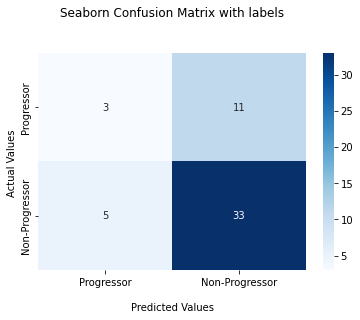

In [51]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Progressor','Non-Progressor'])
ax.yaxis.set_ticklabels(['Progressor','Non-Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_1.evaluate(X_test, y_test)
plt.show()

**In fact, we can use 'y_test_np[:,1]' instead of 'argmax'!

In [52]:
baitest_y = y_test_np.argmax(axis=1)
baitest_y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1])

In [53]:
type(baitest_y)

numpy.ndarray

In [54]:
baitest = y_test_np[:,1]
baitest

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

In [55]:
type(baitest)

numpy.ndarray

In [56]:
np.array_equal(baitest, baitest_y)

True

**HELP on argmax function.**

In [57]:
help(np.argmax)

Help on function argmax in module numpy:

argmax(a, axis=None, out=None, *, keepdims=<no value>)
    Returns the indices of the maximum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result will broadcast correctly against the array.
    
        .. versionadded:: 1.22.0
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed. If `keepdims` is set to True,
    

In [58]:
a = np.arange(6).reshape(2,3) + 10
a[0,1]=20
a[1,0]=9
a

array([[10, 20, 12],
       [ 9, 14, 15]])

In [59]:
a.argmax(axis = 0)

array([0, 0, 1])

In [60]:
a.argmax(axis = 1)

array([1, 2])

so we can see 'argmax' is actually used to find out the index of largest element from each axis.

**Help End**

### CNN model for resampled dataset (NEW)

In [61]:
#create model2
model_2 = Sequential()

#add layers
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_2.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_2.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_1 (Flatten)         (None, 16320)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                1044544   
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                      

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [63]:
model_2.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_2.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 34ms/step - loss: 0.6948 - accuracy: 0.4940 - val_loss: 0.6651 - val_accuracy: 0.6909
Epoch 2/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.6725 - val_accuracy: 0.6909
Epoch 3/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6899 - accuracy: 0.5015 - val_loss: 0.6695 - val_accuracy: 0.6909
Epoch 4/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6891 - accuracy: 0.5589 - val_loss: 0.6637 - val_accuracy: 0.6909
Epoch 5/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6859 - accuracy: 0.5181 - val_loss: 0.6699 - val_accuracy: 0.7091
Epoch 6/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6826 - accuracy: 0.5604 - val_loss: 0.6769 - val_accuracy: 0.5818
Epoch 7/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6779 - accuracy: 0.5861 - val_loss: 0.6667 - val_accuracy: 0.6182
Epoch 

In [64]:
m2_eval_test = model_2.evaluate(X_test, y_test)
m2_eval_val = model_2.evaluate(X_val, y_val)

2/2 [==============================] - 0s 10ms/step - loss: 0.6699 - accuracy: 0.7091


In [65]:
pred = model_2.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 11ms/step
roc auc score:  0.693609022556391
average precision score:  0.6329859294914718


In [66]:
pred

array([[0.4585839 , 0.54141617],
       [0.4597717 , 0.5402283 ],
       [0.48812565, 0.5118743 ],
       [0.49960154, 0.5003984 ],
       [0.50587004, 0.49412993],
       [0.50030255, 0.49969742],
       [0.47180012, 0.52819985],
       [0.48705915, 0.5129408 ],
       [0.4740945 , 0.52590543],
       [0.48035535, 0.5196447 ],
       [0.46373266, 0.5362673 ],
       [0.46198708, 0.5380129 ],
       [0.47393823, 0.52606183],
       [0.45065898, 0.549341  ],
       [0.49447337, 0.50552666],
       [0.45953923, 0.5404608 ],
       [0.45812416, 0.54187584],
       [0.4655211 , 0.5344789 ],
       [0.4940805 , 0.5059195 ],
       [0.49092   , 0.50908   ],
       [0.4870517 , 0.51294833],
       [0.47131115, 0.5286888 ],
       [0.48135763, 0.51864237],
       [0.47642735, 0.5235727 ],
       [0.4589986 , 0.5410014 ],
       [0.4930833 , 0.5069167 ],
       [0.46103075, 0.5389693 ],
       [0.44115525, 0.5588448 ],
       [0.44548094, 0.554519  ],
       [0.50830907, 0.491691  ],
       [0.

In [67]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

In [68]:
y_c

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int32)

In [69]:
y_test_np

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1]], dtype=int32)

2/2 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.7308


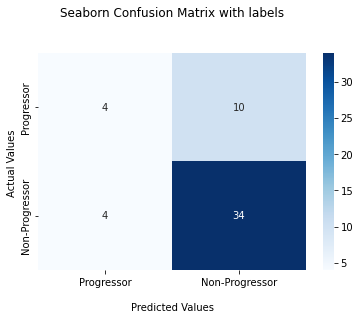

In [70]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Progressor','Non-Progressor'])
ax.yaxis.set_ticklabels(['Progressor','Non-Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_2.evaluate(X_test, y_test)
plt.show()

In [91]:
pred = model_2.predict(X_val)
y_pred = pred
y_c = (y_pred > 0.47).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 6ms/step


In [93]:
pred

array([[0.4855748 , 0.51442516],
       [0.48473492, 0.51526505],
       [0.4570685 , 0.5429315 ],
       [0.44602183, 0.5539781 ],
       [0.46082532, 0.5391747 ],
       [0.4573168 , 0.5426832 ],
       [0.47599363, 0.5240064 ],
       [0.48635066, 0.5136493 ],
       [0.46901828, 0.5309818 ],
       [0.48618758, 0.5138125 ],
       [0.49585724, 0.50414276],
       [0.49576947, 0.50423044],
       [0.4510881 , 0.5489119 ],
       [0.46352404, 0.53647596],
       [0.48213178, 0.5178682 ],
       [0.47806114, 0.52193886],
       [0.49470532, 0.50529474],
       [0.49191302, 0.50808704],
       [0.4934227 , 0.5065773 ],
       [0.48249945, 0.5175005 ],
       [0.48429966, 0.5157003 ],
       [0.4609119 , 0.53908813],
       [0.4499902 , 0.55000985],
       [0.48766562, 0.51233435],
       [0.49585798, 0.50414205],
       [0.47796986, 0.5220302 ],
       [0.4973011 , 0.5026989 ],
       [0.49294904, 0.507051  ],
       [0.49919853, 0.5008015 ],
       [0.49294904, 0.507051  ],
       [0.

In [76]:
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

roc auc score:  0.6393188854489165
average precision score:  0.6311604100163684


2/2 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.7091


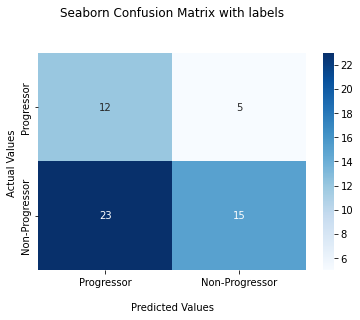

In [92]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Progressor','Non-Progressor'])
ax.yaxis.set_ticklabels(['Progressor','Non-Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_2.evaluate(X_val, y_val)
plt.show()

## Using k-fold validation to train CNN (NEW)

In [95]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [96]:
#Define a function for getting new CNN models.
def get_model():
    #create model
    model = Sequential()

    #add layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
    model.add(MaxPooling1D(pool_size=3))
    # model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    # model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    #Here we use cross-entropy as the criteria for loss.
    return model

In [97]:
#k-fold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [98]:
#Join the training set and validation set together.
X_trainval = np.concatenate((X_train, X_val), axis=0)
X_trainval.shape

(523, 768, 1)

In [99]:
y_trainval = np.concatenate((y_train, y_val), axis = 0)
y_trainval.shape

(523, 2)

In [103]:
y_trainval = y_trainval[:, 0] #Only keep the progressor column

Testing:

In [142]:
baitest = kfold.split(X_trainval, y_trainval)
bailist = list(baitest)
for i in range(5):
    train_idx, val_idx = bailist[i]
    print(type(train_idx))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [149]:
train_idx, val_idx = bailist[0]
X_train_kfold = X_trainval[train_idx]
y_train_kfold = y_trainval[train_idx]
X_val_kfold = X_trainval[val_idx]
y_val_kfold = y_trainval[val_idx]
print(X_train_kfold.shape)
print(y_train_kfold.shape)
print(X_val_kfold.shape)
print(y_val_kfold.shape)

(418, 768, 1)
(418,)
(105, 768, 1)
(105,)


Testing end.

In [171]:
# Variable for keeping count of split we are executing
j = 0
list_kfold = list(kfold.split(X_trainval, y_trainval))
data_kfold = pd.DataFrame()
for i in range(5):
    train_idx, val_idx = list_kfold[i]
    X_train_kfold = X_trainval[train_idx]
    y_train_kfold = y_trainval[train_idx]
    y_train_kfold_complement = 1 - y_train_kfold 
    #Compute its complement and try to join it with 'y_train_kfold' to make it 2-D.
    y_train_kfold = np.stack((y_train_kfold, y_train_kfold_complement), axis=1)
    X_val_kfold = X_trainval[val_idx]
    y_val_kfold = y_trainval[val_idx]
    y_val_kfold_complement = 1 - y_val_kfold
    y_val_kfold = np.stack((y_val_kfold, y_val_kfold_complement), axis=1)
    j += 1
    model_kfold = get_model()
    model_kfold.fit(X_train_kfold, y_train_kfold,
                   validation_data = (X_val_kfold, y_val_kfold),
                   epochs = 500, verbose = True,
                   callbacks = [early_stopping_monitor])
    pred = model_kfold.predict(X_test)
    predicted_class_indices=np.argmax(pred, axis = 1)
    data_kfold[j] = predicted_class_indices
#    gc.collect()    

Epoch 1/500
14/14 [==============================] - 1s 31ms/step - loss: 0.6281 - accuracy: 0.6938 - val_loss: 0.6038 - val_accuracy: 0.7048
Epoch 2/500
14/14 [==============================] - 0s 26ms/step - loss: 0.5965 - accuracy: 0.7057 - val_loss: 0.6090 - val_accuracy: 0.7048
Epoch 3/500
14/14 [==============================] - 0s 23ms/step - loss: 0.5895 - accuracy: 0.7057 - val_loss: 0.6014 - val_accuracy: 0.7048
Epoch 4/500
14/14 [==============================] - 0s 27ms/step - loss: 0.5878 - accuracy: 0.7057 - val_loss: 0.6035 - val_accuracy: 0.7048
Epoch 5/500
14/14 [==============================] - 0s 27ms/step - loss: 0.5875 - accuracy: 0.7057 - val_loss: 0.6004 - val_accuracy: 0.7048
Epoch 6/500
14/14 [==============================] - 0s 31ms/step - loss: 0.5876 - accuracy: 0.7057 - val_loss: 0.6036 - val_accuracy: 0.7048
Epoch 7/500
14/14 [==============================] - 0s 26ms/step - loss: 0.5823 - accuracy: 0.7057 - val_loss: 0.5998 - val_accuracy: 0.7048
Epoch 

14/14 [==============================] - 0s 20ms/step - loss: 0.4683 - accuracy: 0.7703 - val_loss: 0.6240 - val_accuracy: 0.7238
Epoch 116/500
14/14 [==============================] - 0s 20ms/step - loss: 0.4713 - accuracy: 0.7703 - val_loss: 0.6209 - val_accuracy: 0.7238
Epoch 117/500
14/14 [==============================] - 0s 20ms/step - loss: 0.4688 - accuracy: 0.7632 - val_loss: 0.6203 - val_accuracy: 0.7333
Epoch 118/500
14/14 [==============================] - 0s 20ms/step - loss: 0.4710 - accuracy: 0.7679 - val_loss: 0.6137 - val_accuracy: 0.7333
Epoch 119/500
14/14 [==============================] - 0s 22ms/step - loss: 0.4724 - accuracy: 0.7703 - val_loss: 0.6283 - val_accuracy: 0.7238
Epoch 120/500
14/14 [==============================] - 0s 19ms/step - loss: 0.4683 - accuracy: 0.7727 - val_loss: 0.6129 - val_accuracy: 0.7333
Epoch 121/500
14/14 [==============================] - 0s 18ms/step - loss: 0.4639 - accuracy: 0.7656 - val_loss: 0.6191 - val_accuracy: 0.7333
Epoch 

Epoch 172/500
14/14 [==============================] - 0s 25ms/step - loss: 0.4299 - accuracy: 0.8086 - val_loss: 0.6534 - val_accuracy: 0.7524
Epoch 173/500
14/14 [==============================] - 0s 24ms/step - loss: 0.4240 - accuracy: 0.7990 - val_loss: 0.6419 - val_accuracy: 0.7429
Epoch 174/500
14/14 [==============================] - 0s 24ms/step - loss: 0.4257 - accuracy: 0.8086 - val_loss: 0.6331 - val_accuracy: 0.7429
Epoch 175/500
14/14 [==============================] - 0s 22ms/step - loss: 0.4156 - accuracy: 0.8062 - val_loss: 0.6396 - val_accuracy: 0.7333
Epoch 176/500
14/14 [==============================] - 0s 22ms/step - loss: 0.4237 - accuracy: 0.7919 - val_loss: 0.6638 - val_accuracy: 0.7429
Epoch 177/500
14/14 [==============================] - 0s 24ms/step - loss: 0.4201 - accuracy: 0.8014 - val_loss: 0.6437 - val_accuracy: 0.7524
Epoch 178/500
14/14 [==============================] - 0s 25ms/step - loss: 0.4256 - accuracy: 0.8062 - val_loss: 0.6422 - val_accuracy:

Epoch 229/500
14/14 [==============================] - 0s 21ms/step - loss: 0.3784 - accuracy: 0.8325 - val_loss: 0.6625 - val_accuracy: 0.6857
Epoch 230/500
14/14 [==============================] - 0s 20ms/step - loss: 0.3731 - accuracy: 0.8349 - val_loss: 0.6872 - val_accuracy: 0.7333
Epoch 231/500
14/14 [==============================] - 0s 19ms/step - loss: 0.3758 - accuracy: 0.8278 - val_loss: 0.6896 - val_accuracy: 0.7238
Epoch 232/500
14/14 [==============================] - 0s 21ms/step - loss: 0.3764 - accuracy: 0.8397 - val_loss: 0.6732 - val_accuracy: 0.6952
Epoch 233/500
14/14 [==============================] - 0s 19ms/step - loss: 0.3692 - accuracy: 0.8493 - val_loss: 0.6704 - val_accuracy: 0.6857
Epoch 234/500
14/14 [==============================] - 0s 20ms/step - loss: 0.3642 - accuracy: 0.8469 - val_loss: 0.6827 - val_accuracy: 0.6952
Epoch 235/500
14/14 [==============================] - 0s 21ms/step - loss: 0.3786 - accuracy: 0.8158 - val_loss: 0.7155 - val_accuracy:

Epoch 27/500
14/14 [==============================] - 0s 23ms/step - loss: 0.5670 - accuracy: 0.7105 - val_loss: 0.5930 - val_accuracy: 0.6857
Epoch 28/500
14/14 [==============================] - 0s 24ms/step - loss: 0.5621 - accuracy: 0.7153 - val_loss: 0.5896 - val_accuracy: 0.6667
Epoch 29/500
14/14 [==============================] - 0s 24ms/step - loss: 0.5645 - accuracy: 0.7129 - val_loss: 0.5935 - val_accuracy: 0.6857
Epoch 30/500
14/14 [==============================] - 0s 23ms/step - loss: 0.5623 - accuracy: 0.7153 - val_loss: 0.5926 - val_accuracy: 0.6857
Epoch 31/500
14/14 [==============================] - 0s 22ms/step - loss: 0.5618 - accuracy: 0.7177 - val_loss: 0.5932 - val_accuracy: 0.6762
Epoch 32/500
14/14 [==============================] - 0s 20ms/step - loss: 0.5599 - accuracy: 0.7225 - val_loss: 0.5923 - val_accuracy: 0.6571
Epoch 33/500
14/14 [==============================] - 0s 23ms/step - loss: 0.5612 - accuracy: 0.7201 - val_loss: 0.5970 - val_accuracy: 0.6857

14/14 [==============================] - 0s 20ms/step - loss: 0.4478 - accuracy: 0.8110 - val_loss: 0.5855 - val_accuracy: 0.6857
Epoch 142/500
14/14 [==============================] - 0s 21ms/step - loss: 0.4406 - accuracy: 0.8086 - val_loss: 0.5893 - val_accuracy: 0.7048
Epoch 143/500
14/14 [==============================] - 0s 20ms/step - loss: 0.4472 - accuracy: 0.8158 - val_loss: 0.5902 - val_accuracy: 0.6762
Epoch 144/500
14/14 [==============================] - 0s 21ms/step - loss: 0.4438 - accuracy: 0.8062 - val_loss: 0.5903 - val_accuracy: 0.6857
Epoch 145/500
14/14 [==============================] - 0s 20ms/step - loss: 0.4426 - accuracy: 0.8158 - val_loss: 0.5936 - val_accuracy: 0.6952
Epoch 146/500
14/14 [==============================] - 0s 21ms/step - loss: 0.4467 - accuracy: 0.8158 - val_loss: 0.5896 - val_accuracy: 0.6857
Epoch 147/500
14/14 [==============================] - 0s 20ms/step - loss: 0.4360 - accuracy: 0.8134 - val_loss: 0.5886 - val_accuracy: 0.6762
Epoch 

Epoch 198/500
14/14 [==============================] - 0s 26ms/step - loss: 0.3865 - accuracy: 0.8397 - val_loss: 0.6020 - val_accuracy: 0.7143
Epoch 199/500
14/14 [==============================] - 0s 23ms/step - loss: 0.3912 - accuracy: 0.8445 - val_loss: 0.6077 - val_accuracy: 0.7143
Epoch 200/500
14/14 [==============================] - 0s 23ms/step - loss: 0.3913 - accuracy: 0.8349 - val_loss: 0.6033 - val_accuracy: 0.7143
Epoch 201/500
14/14 [==============================] - 0s 20ms/step - loss: 0.3867 - accuracy: 0.8469 - val_loss: 0.5997 - val_accuracy: 0.7143
Epoch 202/500
14/14 [==============================] - 0s 23ms/step - loss: 0.3792 - accuracy: 0.8517 - val_loss: 0.6028 - val_accuracy: 0.7143
Epoch 203/500
14/14 [==============================] - 0s 24ms/step - loss: 0.3814 - accuracy: 0.8397 - val_loss: 0.6076 - val_accuracy: 0.7048
Epoch 204/500
14/14 [==============================] - 0s 25ms/step - loss: 0.3852 - accuracy: 0.8421 - val_loss: 0.6109 - val_accuracy:

Epoch 255/500
14/14 [==============================] - 0s 23ms/step - loss: 0.3236 - accuracy: 0.8828 - val_loss: 0.6255 - val_accuracy: 0.7143
Epoch 256/500
14/14 [==============================] - 0s 19ms/step - loss: 0.3247 - accuracy: 0.8852 - val_loss: 0.6170 - val_accuracy: 0.6857
Epoch 257/500
14/14 [==============================] - 0s 22ms/step - loss: 0.3419 - accuracy: 0.8780 - val_loss: 0.6199 - val_accuracy: 0.6667
Epoch 258/500
14/14 [==============================] - 0s 21ms/step - loss: 0.3315 - accuracy: 0.8780 - val_loss: 0.6222 - val_accuracy: 0.6857
Epoch 259/500
14/14 [==============================] - 0s 21ms/step - loss: 0.3415 - accuracy: 0.8708 - val_loss: 0.6200 - val_accuracy: 0.6762
Epoch 260/500
14/14 [==============================] - 0s 20ms/step - loss: 0.3229 - accuracy: 0.8780 - val_loss: 0.6153 - val_accuracy: 0.7048
Epoch 261/500
14/14 [==============================] - 0s 22ms/step - loss: 0.3185 - accuracy: 0.8852 - val_loss: 0.6176 - val_accuracy:

Epoch 312/500
14/14 [==============================] - 0s 25ms/step - loss: 0.2759 - accuracy: 0.8971 - val_loss: 0.6650 - val_accuracy: 0.6762
Epoch 313/500
14/14 [==============================] - 0s 28ms/step - loss: 0.2635 - accuracy: 0.9091 - val_loss: 0.6696 - val_accuracy: 0.6857
Epoch 314/500
14/14 [==============================] - 0s 22ms/step - loss: 0.2756 - accuracy: 0.9043 - val_loss: 0.6721 - val_accuracy: 0.6857
Epoch 315/500
14/14 [==============================] - 0s 22ms/step - loss: 0.2613 - accuracy: 0.9115 - val_loss: 0.6671 - val_accuracy: 0.6952
Epoch 316/500
14/14 [==============================] - 0s 26ms/step - loss: 0.2697 - accuracy: 0.9043 - val_loss: 0.6637 - val_accuracy: 0.6952
Epoch 317/500
14/14 [==============================] - 0s 23ms/step - loss: 0.2700 - accuracy: 0.8995 - val_loss: 0.6624 - val_accuracy: 0.7048
Epoch 318/500
14/14 [==============================] - 0s 27ms/step - loss: 0.2726 - accuracy: 0.9091 - val_loss: 0.6637 - val_accuracy:

Epoch 15/500
14/14 [==============================] - 0s 31ms/step - loss: 0.5738 - accuracy: 0.7057 - val_loss: 0.5848 - val_accuracy: 0.7048
Epoch 16/500
14/14 [==============================] - 0s 34ms/step - loss: 0.5664 - accuracy: 0.7057 - val_loss: 0.5823 - val_accuracy: 0.7048
Epoch 17/500
14/14 [==============================] - 0s 31ms/step - loss: 0.5658 - accuracy: 0.7057 - val_loss: 0.5800 - val_accuracy: 0.7048
Epoch 18/500
14/14 [==============================] - 0s 24ms/step - loss: 0.5683 - accuracy: 0.7057 - val_loss: 0.5805 - val_accuracy: 0.7048
Epoch 19/500
14/14 [==============================] - 0s 22ms/step - loss: 0.5635 - accuracy: 0.7081 - val_loss: 0.5831 - val_accuracy: 0.7048
Epoch 20/500
14/14 [==============================] - 0s 23ms/step - loss: 0.5620 - accuracy: 0.7081 - val_loss: 0.5832 - val_accuracy: 0.7048
Epoch 21/500
14/14 [==============================] - 0s 21ms/step - loss: 0.5611 - accuracy: 0.7057 - val_loss: 0.5819 - val_accuracy: 0.7048

2/2 [==============================] - 0s 4ms/step
Epoch 1/500
14/14 [==============================] - 1s 47ms/step - loss: 0.6305 - accuracy: 0.7041 - val_loss: 0.6073 - val_accuracy: 0.7115
Epoch 2/500
14/14 [==============================] - 0s 27ms/step - loss: 0.6053 - accuracy: 0.7041 - val_loss: 0.5936 - val_accuracy: 0.7115
Epoch 3/500
14/14 [==============================] - 0s 23ms/step - loss: 0.6005 - accuracy: 0.7041 - val_loss: 0.5908 - val_accuracy: 0.7115
Epoch 4/500
14/14 [==============================] - 0s 26ms/step - loss: 0.5867 - accuracy: 0.7041 - val_loss: 0.5894 - val_accuracy: 0.7115
Epoch 5/500
14/14 [==============================] - 0s 24ms/step - loss: 0.5892 - accuracy: 0.7041 - val_loss: 0.5882 - val_accuracy: 0.7115
Epoch 6/500
14/14 [==============================] - 0s 22ms/step - loss: 0.5845 - accuracy: 0.7041 - val_loss: 0.5891 - val_accuracy: 0.7115
Epoch 7/500
14/14 [==============================] - 0s 22ms/step - loss: 0.5861 - accuracy: 0.70

Epoch 58/500
14/14 [==============================] - 0s 26ms/step - loss: 0.5109 - accuracy: 0.7637 - val_loss: 0.5643 - val_accuracy: 0.6827
Epoch 59/500
14/14 [==============================] - 0s 22ms/step - loss: 0.5096 - accuracy: 0.7685 - val_loss: 0.5624 - val_accuracy: 0.6923
Epoch 60/500
14/14 [==============================] - 0s 23ms/step - loss: 0.5131 - accuracy: 0.7661 - val_loss: 0.5638 - val_accuracy: 0.7115
Epoch 61/500
14/14 [==============================] - 0s 22ms/step - loss: 0.5094 - accuracy: 0.7828 - val_loss: 0.5658 - val_accuracy: 0.6731
Epoch 62/500
14/14 [==============================] - 0s 24ms/step - loss: 0.5099 - accuracy: 0.7709 - val_loss: 0.5668 - val_accuracy: 0.7019
Epoch 63/500
14/14 [==============================] - 0s 24ms/step - loss: 0.5119 - accuracy: 0.7566 - val_loss: 0.5647 - val_accuracy: 0.7115
Epoch 64/500
14/14 [==============================] - 0s 26ms/step - loss: 0.5032 - accuracy: 0.7733 - val_loss: 0.5659 - val_accuracy: 0.6923

14/14 [==============================] - 0s 23ms/step - loss: 0.5276 - accuracy: 0.7279 - val_loss: 0.5930 - val_accuracy: 0.6923
Epoch 58/500
14/14 [==============================] - 0s 23ms/step - loss: 0.5228 - accuracy: 0.7279 - val_loss: 0.5912 - val_accuracy: 0.6731
Epoch 59/500
14/14 [==============================] - 0s 24ms/step - loss: 0.5289 - accuracy: 0.7351 - val_loss: 0.5932 - val_accuracy: 0.7019
Epoch 60/500
14/14 [==============================] - 0s 30ms/step - loss: 0.5258 - accuracy: 0.7399 - val_loss: 0.5934 - val_accuracy: 0.7019
Epoch 61/500
14/14 [==============================] - 0s 21ms/step - loss: 0.5236 - accuracy: 0.7422 - val_loss: 0.5941 - val_accuracy: 0.7019
Epoch 62/500
14/14 [==============================] - 0s 23ms/step - loss: 0.5213 - accuracy: 0.7351 - val_loss: 0.5950 - val_accuracy: 0.7019
Epoch 63/500
14/14 [==============================] - 0s 27ms/step - loss: 0.5254 - accuracy: 0.7327 - val_loss: 0.5941 - val_accuracy: 0.7019
Epoch 64/500

So in the above code, we are just repeating the CNN model fitting and predicting on test set 5 times and storing the output in data_kfold.

In [172]:
data_kfold

,1,2,3,4,5
0,1,1,1,1,1
1,1,1,1,1,1
2,1,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,0
5,0,0,1,1,0
6,1,1,1,1,1
7,1,1,1,1,1
8,1,1,1,1,1
9,1,1,1,1,1


In [185]:
data_kfold_arr = np.array(data_kfold) #Convert 'data_kfold' from a dataframe to an array.
data_kfold_arr

array([0, 0, 1, 1, 0])

In [186]:
sum(data_kfold_arr[0])

5

In [192]:
predict_kfold = np.array(range(52))
for i in range(52):
    sum_kfold = sum(data_kfold_arr[i])
    if sum_kfold < 3:
        predict_kfold[i] = 0
    else:
        predict_kfold[i] = 1

In [193]:
predict_kfold

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [217]:
predict_kfold_complement = 1 - predict_kfold
predict_kfold_2D = np.stack((predict_kfold_complement, predict_kfold), axis=1)
predict_kfold_2D

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [210]:
y_test

,Progressor,Non-Progressor
26,0,1
27,0,1
51,1,0
52,0,1
62,1,0
63,0,1
118,0,1
143,1,0
144,0,1
145,0,1


In [218]:
predict_kfold_2D = pd.DataFrame(predict_kfold_2D, columns=('Progressor', 'Non-Progressor'))
predict_kfold_2D

,Progressor,Non-Progressor
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,0,1
9,0,1


Evaluation:

In [219]:
roc_value = roc_auc_score(y_test, predict_kfold_2D)
ap_score = average_precision_score(y_test, predict_kfold_2D)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

roc auc score:  0.518796992481203
average precision score:  0.5083192932163183


## Random Search for Model Tuning

@Yanlong

In [ ]:
# not run
# adding second convolutional layer 
    keras.layers.Conv1D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=16, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    keras.layers.MaxPooling1D(
        pool_size= 2
    ),
    

In [55]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv1D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(768,1)
    ),
    keras.layers.MaxPooling1D(
        pool_size= hp.Choice('pool_size',values = [2,3,5])
    ),
    keras.layers.Dropout(0.5),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(2, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [56]:
es = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [58]:
#importing random search
#from keras_tuner import RandomSearch
import keras_tuner as kt
from tensorflow import keras
#creating randomsearch object
tuner = kt.RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 100)
# search best parameter
tuner.search(X_train,y_train,epochs=200,
             validation_data=(X_val,y_val),
            callbacks=[es]
            )

Trial 100 Complete [00h 00m 20s]
val_accuracy: 0.7272727489471436

Best val_accuracy So Far: 0.7818182110786438
Total elapsed time: 00h 19m 37s
INFO:tensorflow:Oracle triggered exit


In [59]:
model=tuner.get_best_models(num_models=1)[0]
#summary of best model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 766, 48)           192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 383, 48)           0         
_________________________________________________________________
dropout (Dropout)            (None, 383, 48)           0         
_________________________________________________________________
flatten (Flatten)            (None, 18384)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1176640   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,176,962
Trainable params: 1,176,962
Non-trainable params: 0
______________________________________________

In [60]:
pred = model.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

roc auc score:  0.36466165413533835
average precision score:  0.4604905526212037


2022-06-29 12:46:37.010054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [61]:
mbest_eval_test = model.evaluate(X_test, y_test)
mbest_eval_val = model.evaluate(X_val, y_val)

2/2 [==============================] - 0s 20ms/step - loss: 0.6423 - accuracy: 0.7818


2022-06-29 12:46:39.893166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [62]:
pred = model.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

roc auc score:  0.36466165413533835
average precision score:  0.4604905526212037


Save the best model

In [65]:
filename = 'CNN_GRI_roc_value=' + str(roc_value) + '_ap_score=' + str(ap_score) + '.h5'
filename

'CNN_GRI_roc_value=0.36466165413533835_ap_score=0.4604905526212037.h5'

In [33]:
model.save(filename)

INFO:tensorflow:Assets written to: model/assets


In [66]:
y_pred = model.predict(X_test)
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 8ms/step - loss: 1.1378 - accuracy: 0.6346


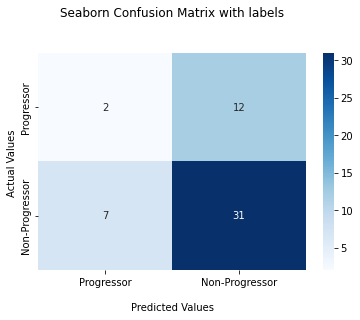

In [68]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Progressor','Non-Progressor'])
ax.yaxis.set_ticklabels(['Progressor','Non-Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('GRI_test.png')
m1_eval_test = model.evaluate(X_test, y_test)
plt.show()

2/2 [==============================] - 0s 8ms/step - loss: 0.6423 - accuracy: 0.7818


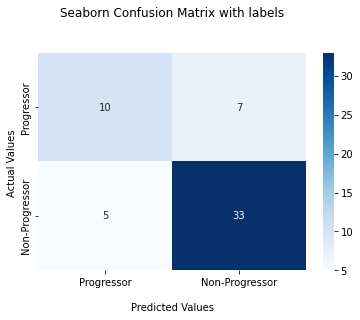

In [69]:
y_pred = model.predict(X_val)
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Progressor','Non-Progressor'])
ax.yaxis.set_ticklabels(['Progressor','Non-Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('GRI_val.png')
m1_eval_test = model.evaluate(X_val, y_val)
plt.show()

## Grid Search for Model Tuning

@Sherry, @Kara

In [48]:
from sklearn.model_selection import GridSearchCV

In [51]:
# Take a look at current model hyper parameters
print(svc_m1._gamma) # 1 / (n_features * X.var())
svc_m1.get_params()

0.1322677742053997


{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [52]:
svc_param_grid = {'C': [1, 4, 6, 8, 10, 20], 'kernel': ['linear', 'rbf', 'poly'], 
                 'gamma': ['scale', 'auto', 0.01, 0.1, 0.25]}
# gamma from scale is 0.5852071349905691
# gamma from auto = 1/n = 0.001
svm_mod_search_all = svm.SVC() 
svc_grid = GridSearchCV(svm_mod_search_all, svc_param_grid)
svc_grid.fit(X_train, y_train_1d)
print(svc_grid.best_params_)

{'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}


In [61]:
svc_optimized = svm.SVC(kernel='rbf', C=20, gamma = 0.01)
svc_optimized.fit(X_train, y_train_1d)

SVC(C=20, gamma=0.01)

In [62]:
svc_optimized_pred = svc_optimized.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test_1d, svc_optimized_pred))
print("True Positives:",metrics.precision_score(y_test_1d, svc_optimized_pred))
print("True Negatives:",metrics.recall_score(y_test_1d, svc_optimized_pred))
metrics.confusion_matrix(y_test_1d, svc_optimized_pred)



Accuracy: 0.7068965517241379
True Positives: 0.0
True Negatives: 0.0


/Users/feiz/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[41,  0],
       [17,  0]])

The grid search optimal parameters may not give you the best performance on the test data, needs more investigation.